## Objectives

##### Use Scikit-learn to implement simple linear regression

###### Importing packages

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

###### read data set

In [34]:
#data = pd.read_csv(r"C:/Users/Aboubakr Ben Bach/Desktop/ML/python/RL/FuelConsumptionCo2.csv")
#data1 = pd.read_csv(r"C:/Users/Aboubakr Ben Bach/Desktop/ML/python/RL/dataset1_conscarb.csv",encoding='ISO-8859-1')


In [268]:
data = pd.read_csv(r"C:/Users/Aboubakr Ben Bach/Desktop/ML/python/RL/dataset_fuelconsCO2.csv",encoding='ISO-8859-1' ,sep=';')

In [269]:
data.head()
data.shape

(1071, 13)

In [270]:
#on fait la copie de notre dataset
df= data.copy()

In [271]:
df.head()

,MODEL_YEAR,MAKE,MODEL_ENGINE,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [111]:
df.dtypes.value_counts()

object     5
float64    4
int64      3
dtype: int64

In [118]:
df.describe()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,3.342577,5.788049,13.285901,9.467694,11.572082,26.464052,256.116713
std,1.415778,1.797425,4.106325,2.788940,3.484679,7.473465,63.530627
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.200000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.600000,10.700000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Analyse de la forme et du fond
**--------------------------Analyse de la forme------------------------**
   - Identification dela target: **CO2EMISSIONS**
   - Nombre de ligne et colonne: **1071 x 13**
   - Type des variables: **qualitatives=5, quantitatives=8**
   - Les valeurs manquantes: **aucune variable manquante**
   
**--------------------------Analyse du fond----------------------------**
   - Signification de la target: CO2EMISSIONS est l'estimation des emissions d'échappement de dixoyde de carbonnes **en gramme / km**
   - Signification des differentes variables:
   - Visualisation de la relation entre la target et les features:

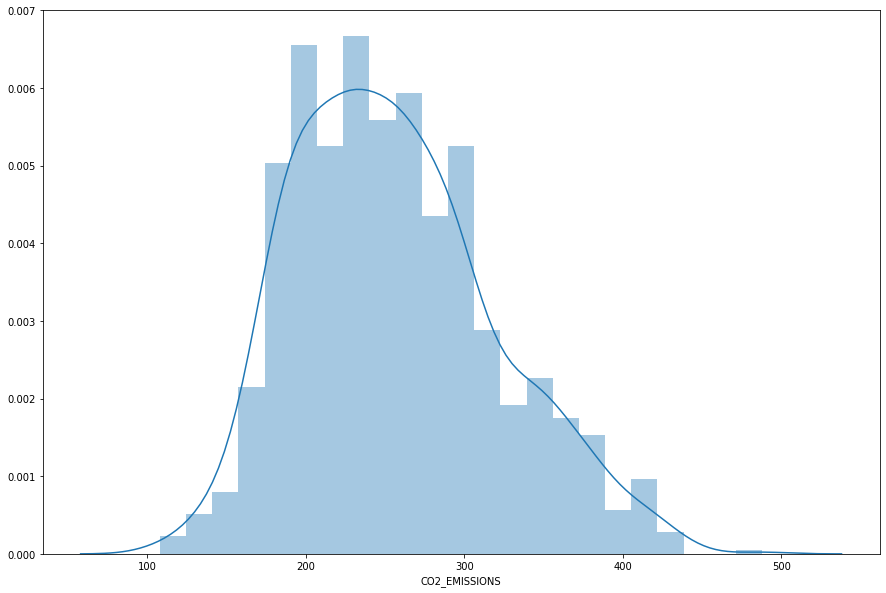

In [273]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['CO2_EMISSIONS'])

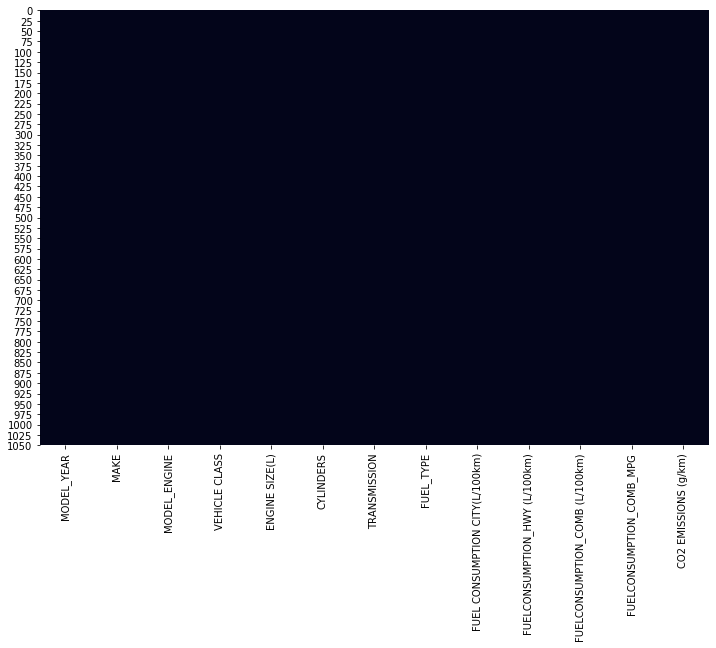

In [70]:
## verification des variables manquantes
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar=False)

In [69]:
(df.isna().sum()/df.shape[0]).sort_values()

MODEL_YEAR                        0.0
MAKE                              0.0
MODEL_ENGINE                      0.0
VEHICLE CLASS                     0.0
ENGINE SIZE(L)                    0.0
CYLINDERS                         0.0
TRANSMISSION                      0.0
FUEL_TYPE                         0.0
FUEL CONSUMPTION CITY(L/100km)    0.0
FUELCONSUMPTION_HWY (L/100km)     0.0
FUELCONSUMPTION_COMB (L/100km)    0.0
FUELCONSUMPTION_COMB_MPG          0.0
CO2 EMISSIONS (g/km)              0.0
dtype: float64

**Histogramme des variables continues**

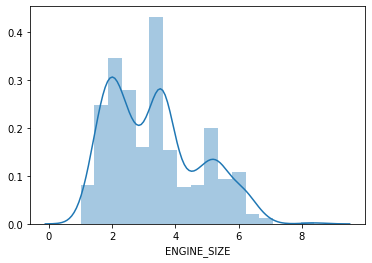

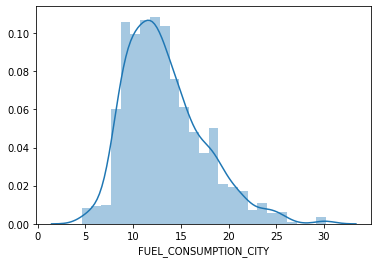

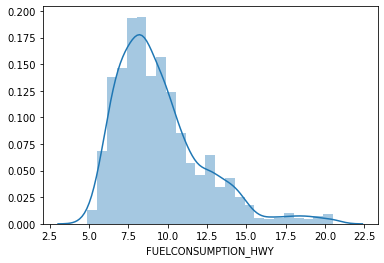

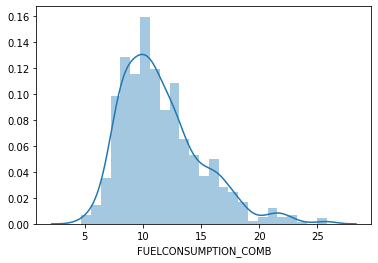

In [112]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

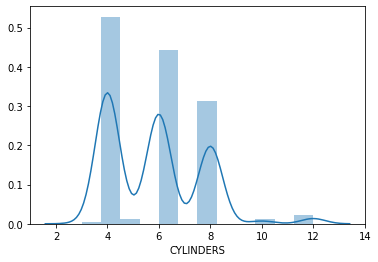

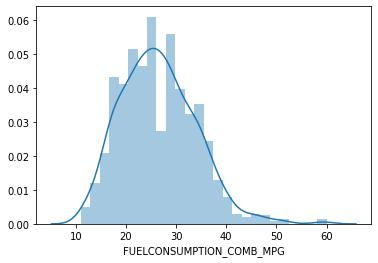

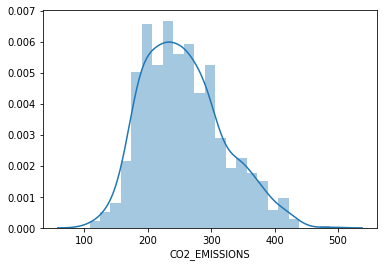

In [113]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

**On selectionne quelques features**

In [141]:
#df.drop(['MODEL_ENGINE',], axis=1)
df1= df[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2_EMISSIONS']]

**On affiche chaque feature par à l'Emission**

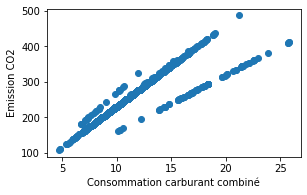

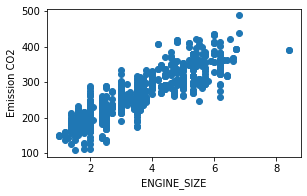

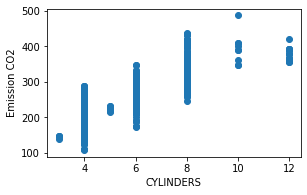

''

In [151]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.scatter(df1.FUELCONSUMPTION_COMB, df1.CO2_EMISSIONS)
plt.xlabel("Consommation carburant combiné")
plt.ylabel("Emission CO2")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,2,2)
plt.scatter(df1.ENGINE_SIZE, df1.CO2_EMISSIONS)
plt.xlabel("ENGINE_SIZE")
plt.ylabel("Emission CO2")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,2,3)
plt.scatter(df1.CYLINDERS, df1.CO2_EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("Emission CO2")
plt.show()

""

**Train and test data**

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
trainset, testset= train_test_split(df, test_size=0.2, random_state=0)

In [156]:
testset.shape

(215, 13)

### Model Simple Regression Linear
    
   **en fonction d'une seule feature**

In [157]:
X_train = np.asanyarray(trainset[['ENGINE_SIZE']])
y_train = np.asanyarray(trainset[['CO2_EMISSIONS']])

In [169]:
y_train.shape

(856, 1)

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print("Coefficient:", lin_reg.coef_)
print("Intercep:", lin_reg.intercept_)

Coefficient: [[39.66108804]]
Intercep: [124.08296486]


**we can plot the fit line over the data:**

Text(0, 0.5, 'Emission CO2')

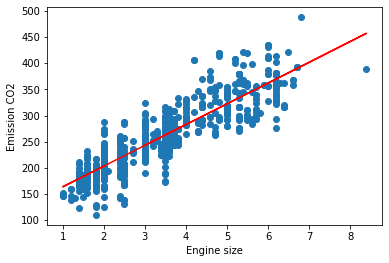

In [181]:
plt.scatter(trainset.ENGINE_SIZE, trainset.CO2_EMISSIONS)
plt.plot(X_train, lin_reg.coef_[0][0]*X_train + lin_reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission CO2")

#### Evaluation

nous comparons les valeurs réelles et les valeurs prédites pour calculer la précision d'un modèle de régression. Les mesures d'évaluation jouent un rôle clé dans le développement d'un modèle, car elles fournissent un aperçu des domaines qui nécessitent des améliorations.

Il existe différentes métriques d'évaluation du modèle, utilisons ici MSE pour calculer la précision de notre modèle en fonction de l'ensemble de test:
```
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
```

In [275]:
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

X_test = np.asanyarray(testset[['ENGINE_SIZE']])
y_test = np.asanyarray(testset[['CO2_EMISSIONS']])
y_pred = lin_reg.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 24.73
Residual sum of squares (MSE): 1067.73
R2-score: 0.67


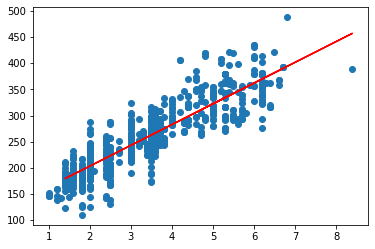

In [227]:
plt.scatter(trainset.ENGINE_SIZE, trainset.CO2_EMISSIONS)
plt.plot(testset.ENGINE_SIZE, y_pred, color='red')
plt.show()

In [182]:
testset

,MODEL_YEAR,MAKE,MODEL_ENGINE,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
929,2014,ROLLS-ROYCE,PHANTOM,FULL-SIZE,6.7,12,A8,Z,20.7,12.8,17.1,17,393
267,2014,CHEVROLET,TAHOE 4WD,SUV - STANDARD,5.3,8,A6,X,16.0,11.1,13.8,20,317
596,2014,JEEP,PATRIOT 4X4,SUV - SMALL,2.4,4,M5,X,10.3,8.4,9.4,30,216
688,2014,LINCOLN,MKZ AWD,MID-SIZE,3.7,6,AS6,X,13.1,9.3,11.4,25,262
1069,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2014,GMC,SAVANA 1500 CARGO,VAN - CARGO,5.3,8,A4,E,23.5,17.7,20.9,14,334
366,2014,FORD,EXPLORER FFV,SUV - STANDARD,3.5,6,AS6,E,18.3,12.9,15.9,18,254
682,2014,LINCOLN,MKS AWD,FULL-SIZE,3.7,6,AS6,X,13.1,9.0,11.3,25,260
478,2014,GMC,YUKON XL,SUV - STANDARD,5.3,8,A6,E,21.5,14.6,18.4,15,294


In [254]:
df_pred = pd.DataFrame({'Réel': y_test.flatten(), 'Predit': y_pred.flatten()})
df_pred.to_csv('Actu_pred.csv')

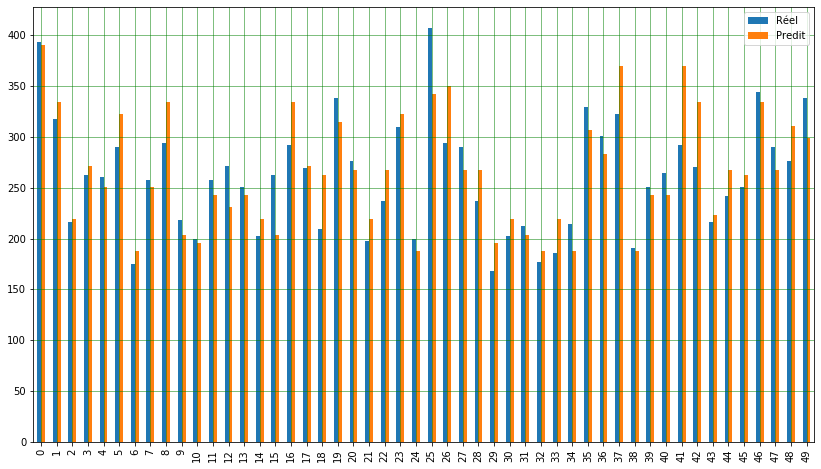

In [261]:
df1 = df_pred.head(50)
df1.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [285]:
def evaluation(lin_reg):
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)


    y_pred = lin_reg.predict(X_test)
    
    print("Coefficient:", lin_reg.coef_)
    print("Intercep:", lin_reg.intercept_)
    
    print("---------------------------------------------------------------")
    print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
    print("R2-score: %.2f" % r2_score(y_pred , y_test) )
    
    ########learning curve #####
    N, train_score, val_score= learning_curve(lin_reg, X_train, y_train,
                                              cv= 4,
                                              scoring= 'neg_mean_squared_error',
                                              train_sizes= np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='Training error')
    plt.plot(N, val_score.mean(axis=1), label='Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
    plt.legend()

    


In [287]:
evaluation(lin_reg)

NameError: name 'mod' is not defined

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)